<a href="https://colab.research.google.com/github/MoRebaie/CNNs-in-Tensorflow/blob/master/Week_4_Rock_Paper_Scissors_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2019-07-15 17:02:54--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.26.48, 2404:6800:4004:809::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.26.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  92.0MB/s    in 2.1s    

2019-07-15 17:02:57 (92.0 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2019-07-15 17:02:59--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.24.144, 2404:6800:4004:800::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.24.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/tm

In [0]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [4]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock07-k03-088.png', 'rock01-048.png', 'rock03-044.png', 'rock03-060.png', 'rock04-022.png', 'rock07-k03-030.png', 'rock04-055.png', 'rock07-k03-072.png', 'rock06ck02-056.png', 'rock04-069.png']
['paper05-008.png', 'paper07-070.png', 'paper07-056.png', 'paper04-050.png', 'paper06-108.png', 'paper02-021.png', 'paper07-048.png', 'paper04-045.png', 'paper04-020.png', 'paper05-068.png']
['testscissors02-037.png', 'testscissors03-066.png', 'testscissors01-091.png', 'scissors02-109.png', 'scissors04-011.png', 'scissors01-015.png', 'scissors04-113.png', 'testscissors02-082.png', 'scissors04-073.png', 'testscissors02-118.png']


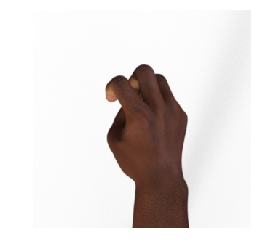

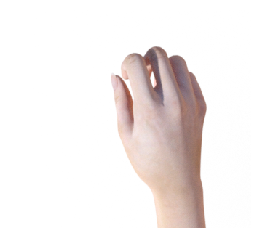

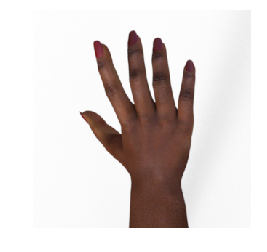

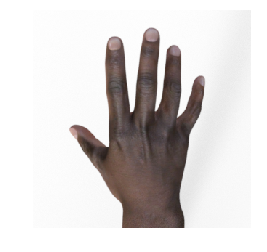

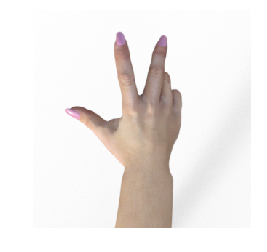

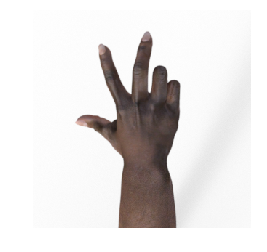

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [6]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [7]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


W0715 17:03:06.463178 139660971800448 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [9]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit_generator(train_generator, epochs=25, validation_data = validation_generator, verbose = 1)

model.save("rps.h5")

Epoch 1/25
79/79 [==============================] - 25s 313ms/step - loss: 1.3684 - acc: 0.3659 - val_loss: 1.0890 - val_acc: 0.3414
Epoch 2/25
79/79 [==============================] - 21s 268ms/step - loss: 0.9274 - acc: 0.5472 - val_loss: 0.4161 - val_acc: 0.9624
Epoch 3/25
79/79 [==============================] - 21s 269ms/step - loss: 0.6026 - acc: 0.7540 - val_loss: 0.1514 - val_acc: 0.9758
Epoch 4/25
79/79 [==============================] - 20s 259ms/step - loss: 0.4245 - acc: 0.8306 - val_loss: 0.2658 - val_acc: 0.9059
Epoch 5/25
79/79 [==============================] - 21s 261ms/step - loss: 0.2809 - acc: 0.8976 - val_loss: 0.1257 - val_acc: 0.9462
Epoch 6/25
79/79 [==============================] - 20s 257ms/step - loss: 0.2124 - acc: 0.9226 - val_loss: 0.0581 - val_acc: 0.9758
Epoch 7/25
79/79 [==============================] - 20s 256ms/step - loss: 0.2034 - acc: 0.9266 - val_loss: 0.0382 - val_acc: 0.9892
Epoch 8/25
79/79 [==============================] - 21s 260ms/step - 

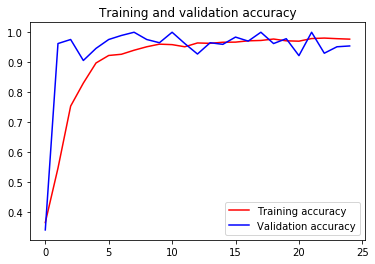

<Figure size 432x288 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [16]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving paper01-077.png to paper01-077.png
Saving paper02-091.png to paper02-091.png
Saving rock01-026.png to rock01-026.png
Saving rock07-k03-004.png to rock07-k03-004.png
Saving testscissors01-008.png to testscissors01-008.png
Saving testscissors02-036.png to testscissors02-036.png
paper01-077.png
[[1. 0. 0.]]
paper02-091.png
[[1. 0. 0.]]
rock01-026.png
[[0. 1. 0.]]
rock07-k03-004.png
[[0. 1. 0.]]
testscissors01-008.png
[[0. 0. 1.]]
testscissors02-036.png
[[0. 0. 1.]]
